In [17]:
import tensorflow as tf
import tensorflow.keras.layers as layers
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage, misc

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

y_train = tf.one_hot(y_train, 10)
y_test = tf.one_hot(y_test, 10)
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
Number of images in x_train 60000
Number of images in x_test 10000


In [4]:
def get_simple_model(input_shape):
    model = tf.keras.Sequential()
    model.add(layers.Flatten(input_shape=input_shape))
    model.add(layers.Dense(400, activation='relu'))
    model.add(layers.Dense(200, activation='relu'))
    model.add(layers.Dense(10,activation=tf.nn.softmax))
    return model

def get_regularized_model(input_shape):
    dropout = 0.05
    model = tf.keras.Sequential()
    model.add(layers.Flatten(input_shape=input_shape))
    model.add(layers.Dropout(dropout))
    model.add(layers.Dense(400, activation='relu'))
    model.add(layers.Dropout(dropout))
    model.add(layers.Dense(200, activation='relu'))
    model.add(layers.Dense(10,activation=tf.nn.softmax))
    return model

def get_robust_model(input_shape):
    dropout = 0.05
    inputs = layers.Input(shape= input_shape)
    x = layers.Flatten()(inputs)
    x = layers.Dropout(dropout)(x, training=True)
    x = layers.Dense(400, activation='relu')(x)
    x = layers.Dropout(dropout)(x, training=True)
    x = layers.Dense(200, activation='relu')(x)
    out = layers.Dense(10, activation=tf.nn.softmax)(x)
    return tf.keras.Model(inputs, out)

def predict_robust(model, x):
    y = []
    for _ in range(10):
        y.append(model(x))
    y_mean = np.mean(y, axis=0)
    y_var = np.var(y, axis=0)
    return y, tf.convert_to_tensor(y_mean), tf.convert_to_tensor(y_var)

In [5]:
simple_model = get_simple_model((28,28,1))
simple_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 400)               314000    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
_________________________________________________________________


In [6]:
regularized_model = get_regularized_model((28,28,1))
regularized_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 400)               314000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2010      
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
________________________________________________

In [7]:
robust_model = get_robust_model((28,28,1))
robust_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 400)               314000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2010  

In [8]:
simple_model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
simple_model.fit(x=x_train,y=y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

W0827 14:28:59.195183 53840 deprecation.py:323] From C:\ProgramData\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2392 - accuracy: 0.9302 - val_loss: 0.1067 - val_accuracy: 0.9671
Epoch 2/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0885 - accuracy: 0.9732 - val_loss: 0.0775 - val_accuracy: 0.9762
Epoch 3/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0573 - accuracy: 0.9822 - val_loss: 0.0715 - val_accuracy: 0.9772
Epoch 4/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0405 - accuracy: 0.9870 - val_loss: 0.0722 - val_accuracy: 0.9774
Epoch 5/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0289 - accuracy: 0.9906 - val_loss: 0.0639 - val_accuracy: 0.9808
Epoch 6/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0228 - accuracy: 0.9927 - val_loss: 0.0769 - val_accuracy: 0.9779
Epoch 7/10
60000/60000 [==============================] 

In [9]:
regularized_model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
regularized_model.fit(x=x_train,y=y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2593 - accuracy: 0.9241 - val_loss: 0.1069 - val_accuracy: 0.9662
Epoch 2/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0987 - accuracy: 0.9697 - val_loss: 0.0900 - val_accuracy: 0.9709
Epoch 3/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0677 - accuracy: 0.9780 - val_loss: 0.0684 - val_accuracy: 0.9774
Epoch 4/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0531 - accuracy: 0.9830 - val_loss: 0.0604 - val_accuracy: 0.9800
Epoch 5/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0400 - accuracy: 0.9870 - val_loss: 0.0731 - val_accuracy: 0.9778
Epoch 6/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0334 - accuracy: 0.9891 - val_loss: 0.0670 - val_accuracy: 0.9787
Epoch 7/10
60000/60000 [==============================] 

In [10]:
robust_model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
robust_model.fit(x=x_train,y=y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2558 - accuracy: 0.9258 - val_loss: 0.1235 - val_accuracy: 0.9614
Epoch 2/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0999 - accuracy: 0.9695 - val_loss: 0.0912 - val_accuracy: 0.9707
Epoch 3/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0676 - accuracy: 0.9783 - val_loss: 0.0832 - val_accuracy: 0.9733
Epoch 4/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0520 - accuracy: 0.9831 - val_loss: 0.0666 - val_accuracy: 0.9786
Epoch 5/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0418 - accuracy: 0.9863 - val_loss: 0.0728 - val_accuracy: 0.9768
Epoch 6/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0333 - accuracy: 0.9888 - val_loss: 0.0737 - val_accuracy: 0.9777
Epoch 7/10
60000/60000 [==============================] 

## Rotate image

In [11]:
index = np.argwhere(np.argmax(y_train, axis=1)==2)[0][0]
x = x_train[index]
x = np.expand_dims(x, axis=0)
y = y_train[index]

In [12]:
result = []
rotations = [0,20,40,60,80,100,120]
for i in rotations:
    t = ndimage.rotate(input=x[0,:,:,0], angle=i, reshape=False)
    t = np.expand_dims(t, axis=0)
    t = np.expand_dims(t, axis=-1)
    _, y_mean, y_var = predict_robust(robust_model, t)
    y_simple = simple_model.predict(t)
    y_regularied = regularized_model.predict(t)
    result.append([i, y_mean[0], y_var[0], t[0,:,:,0], y_simple, y_regularied])



Rotation: 0


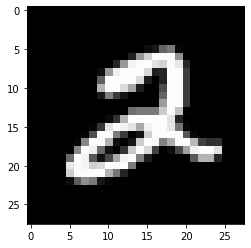

0 	 Mean: 1.1844272194139194e-06, 	 Variance: 7.761050482835152e-12, 
	 y_simple: 8.221995133339544e-12 y_reg: 8.298327580646969e-10

1 	 Mean: 6.07119199358408e-09, 	 Variance: 1.5028922126745302e-17, 
	 y_simple: 4.523156604818723e-08 y_reg: 1.0426203971292125e-06

2 	 Mean: 0.9999947547912598, 	 Variance: 1.8508217528023785e-11, 
	 y_simple: 0.9999998807907104 y_reg: 0.9999568462371826

3 	 Mean: 2.377519422225305e-06, 	 Variance: 3.0399450318130405e-12, 
	 y_simple: 1.1452927850541528e-07 y_reg: 7.03459772921633e-06

4 	 Mean: 1.4075439480620844e-08, 	 Variance: 5.254268720991369e-16, 
	 y_simple: 1.0829941804457732e-10 y_reg: 7.346639963046186e-10

5 	 Mean: 3.7789817497468903e-07, 	 Variance: 1.4451056996010736e-13, 
	 y_simple: 3.9447647925960894e-10 y_reg: 1.9522341077049532e-08

6 	 Mean: 6.205706171158454e-08, 	 Variance: 3.4656630440199924e-15, 
	 y_simple: 2.5153248928155847e-10 y_reg: 1.449735609337921e-10

7 	 Mean: 3.721214625329594e-07, 	 Variance: 9.02205420831928e-14,

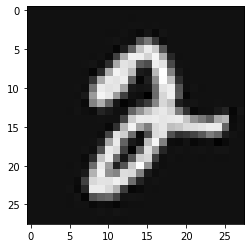

0 	 Mean: 5.931183295615483e-06, 	 Variance: 5.233908792479092e-11, 
	 y_simple: 0.00034232967300340533 y_reg: 5.878205683984561e-06

1 	 Mean: 2.1071930689231522e-07, 	 Variance: 1.1419171001576106e-13, 
	 y_simple: 2.2053754946682602e-05 y_reg: 1.1952844033658039e-05

2 	 Mean: 0.9997749328613281, 	 Variance: 1.4025387073957063e-08, 
	 y_simple: 0.9280242323875427 y_reg: 0.9971060156822205

3 	 Mean: 2.5276565907006443e-07, 	 Variance: 4.876193849742694e-14, 
	 y_simple: 0.0019550537690520287 y_reg: 0.00032787921372801065

4 	 Mean: 4.414660565998929e-07, 	 Variance: 8.722604344542362e-13, 
	 y_simple: 2.18853841715827e-07 y_reg: 3.8864851603648276e-07

5 	 Mean: 1.5839269895678854e-09, 	 Variance: 4.3949818208810345e-18, 
	 y_simple: 7.320750938788478e-08 y_reg: 1.2493450185502297e-07

6 	 Mean: 3.016042171566369e-07, 	 Variance: 1.590162734561168e-13, 
	 y_simple: 4.719634887351276e-07 y_reg: 2.0370745801301382e-07

7 	 Mean: 7.574204119009664e-06, 	 Variance: 1.8460152850785505e-1

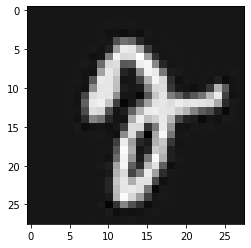

0 	 Mean: 7.700054266024381e-05, 	 Variance: 5.171113759416812e-09, 
	 y_simple: 2.9037579452051432e-08 y_reg: 9.499179896010901e-07

1 	 Mean: 6.073150160545993e-08, 	 Variance: 4.9806371626005905e-15, 
	 y_simple: 1.3244701169146111e-10 y_reg: 8.134649220892243e-08

2 	 Mean: 5.588059138972312e-06, 	 Variance: 3.4240797697204783e-11, 
	 y_simple: 3.9164369525224174e-09 y_reg: 1.6764864767537802e-06

3 	 Mean: 8.778411938692443e-06, 	 Variance: 3.7554034881814857e-10, 
	 y_simple: 5.8467630736913634e-08 y_reg: 1.5319310477934778e-05

4 	 Mean: 3.4052856790367514e-05, 	 Variance: 2.282090294514205e-09, 
	 y_simple: 2.0225112251637256e-08 y_reg: 0.0001222032296936959

5 	 Mean: 1.0810016419782187e-06, 	 Variance: 3.849730430272036e-12, 
	 y_simple: 2.504856544405243e-09 y_reg: 4.777195954375202e-06

6 	 Mean: 1.036894627759466e-05, 	 Variance: 5.882082598773763e-10, 
	 y_simple: 1.0386114581706352e-06 y_reg: 8.573506420361809e-07

7 	 Mean: 4.444375736056827e-05, 	 Variance: 2.428869771

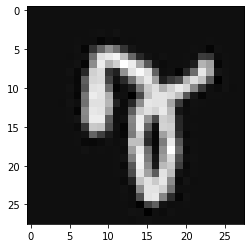

0 	 Mean: 0.0005814635660499334, 	 Variance: 3.115908384643262e-07, 
	 y_simple: 1.782886215551116e-06 y_reg: 0.0001196792654809542

1 	 Mean: 0.000536904321052134, 	 Variance: 1.218662362134637e-07, 
	 y_simple: 1.697876115258623e-07 y_reg: 0.00011052456829929724

2 	 Mean: 0.0004851041885558516, 	 Variance: 3.179865188940312e-07, 
	 y_simple: 1.2082278999514529e-07 y_reg: 7.790830750309397e-06

3 	 Mean: 0.0008091251365840435, 	 Variance: 2.3403124771448347e-07, 
	 y_simple: 7.017891039140522e-05 y_reg: 0.00010267791367368773

4 	 Mean: 0.00869620032608509, 	 Variance: 9.650902211433277e-05, 
	 y_simple: 0.0007706624455749989 y_reg: 0.030374977737665176

5 	 Mean: 0.0023751009721308947, 	 Variance: 5.893564775760751e-06, 
	 y_simple: 6.578381999133853e-06 y_reg: 0.0017589875496923923

6 	 Mean: 0.0032950385939329863, 	 Variance: 9.296287316828966e-06, 
	 y_simple: 1.6801708625280298e-05 y_reg: 0.0019908896647393703

7 	 Mean: 0.052896566689014435, 	 Variance: 0.00339503469876945, 
	 

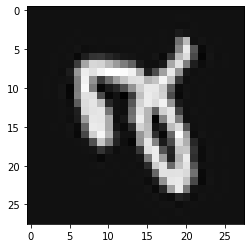

0 	 Mean: 0.0028891433030366898, 	 Variance: 3.7414035887195496e-06, 
	 y_simple: 3.60443809768185e-05 y_reg: 6.699279038002715e-05

1 	 Mean: 0.0021722163073718548, 	 Variance: 6.521717068608268e-07, 
	 y_simple: 0.0003398500266484916 y_reg: 0.03515855595469475

2 	 Mean: 0.00030845304718241096, 	 Variance: 1.651443426453625e-08, 
	 y_simple: 1.4090568356550648e-07 y_reg: 8.682211773702875e-05

3 	 Mean: 0.12158405780792236, 	 Variance: 0.0037713940255343914, 
	 y_simple: 0.010486982762813568 y_reg: 0.02959117479622364

4 	 Mean: 0.42695850133895874, 	 Variance: 0.05750807002186775, 
	 y_simple: 0.3007132411003113 y_reg: 0.4959195554256439

5 	 Mean: 0.003216319251805544, 	 Variance: 6.572895017598057e-06, 
	 y_simple: 0.0008061114349402487 y_reg: 0.0013063994701951742

6 	 Mean: 5.074064392829314e-05, 	 Variance: 5.747460285476791e-10, 
	 y_simple: 6.162953809507599e-07 y_reg: 8.169685315806419e-06

7 	 Mean: 0.1338692009449005, 	 Variance: 0.005694965831935406, 
	 y_simple: 0.014036

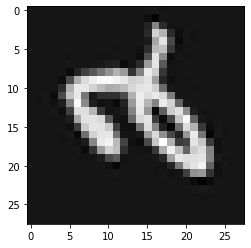

0 	 Mean: 0.13658052682876587, 	 Variance: 0.029797781258821487, 
	 y_simple: 0.0021137259900569916 y_reg: 0.02466415800154209

1 	 Mean: 9.152650818577968e-06, 	 Variance: 4.322999597183852e-11, 
	 y_simple: 9.953857897926355e-07 y_reg: 1.6938563931034878e-05

2 	 Mean: 0.02789301611483097, 	 Variance: 0.0007967998972162604, 
	 y_simple: 7.324921170948073e-05 y_reg: 0.00018086678755935282

3 	 Mean: 0.5129873752593994, 	 Variance: 0.08809889853000641, 
	 y_simple: 0.9222168326377869 y_reg: 0.7194288372993469

4 	 Mean: 0.005110303871333599, 	 Variance: 7.429130346281454e-05, 
	 y_simple: 0.002226020209491253 y_reg: 7.1018880589690525e-06

5 	 Mean: 0.0015492405509576201, 	 Variance: 6.098746894167562e-07, 
	 y_simple: 0.001908235950395465 y_reg: 0.012416788376867771

6 	 Mean: 0.0003873172390740365, 	 Variance: 1.124791424444993e-06, 
	 y_simple: 0.00015898607671260834 y_reg: 3.957194167014677e-06

7 	 Mean: 0.0011305306106805801, 	 Variance: 2.3924079073367466e-07, 
	 y_simple: 2.744

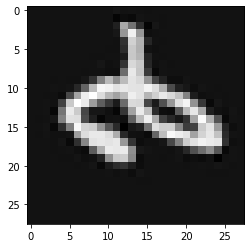

0 	 Mean: 0.9159534573554993, 	 Variance: 0.004330787807703018, 
	 y_simple: 0.999581515789032 y_reg: 0.8755454421043396

1 	 Mean: 6.321823207144917e-07, 	 Variance: 2.498753428562678e-13, 
	 y_simple: 1.1282010048407898e-10 y_reg: 3.7532663554884493e-06

2 	 Mean: 0.006030387245118618, 	 Variance: 1.789565067156218e-05, 
	 y_simple: 1.0768444980158165e-07 y_reg: 0.005444603506475687

3 	 Mean: 0.043657273054122925, 	 Variance: 0.002787854988127947, 
	 y_simple: 0.00021113666298333555 y_reg: 0.10500023514032364

4 	 Mean: 3.884327088599093e-05, 	 Variance: 8.890248537340995e-10, 
	 y_simple: 7.714569250083514e-08 y_reg: 4.892622200713959e-07

5 	 Mean: 0.0027711738366633654, 	 Variance: 1.2832502761739306e-05, 
	 y_simple: 9.131381943916494e-07 y_reg: 0.00025663641281425953

6 	 Mean: 0.01835072785615921, 	 Variance: 0.0003626889956649393, 
	 y_simple: 0.00020161696011200547 y_reg: 0.00012297939974814653

7 	 Mean: 0.0025480655021965504, 	 Variance: 2.7397447865951108e-06, 
	 y_simple

In [13]:
for r in result:
    print()
    print(f'Rotation: {r[0]}')
    plt.imshow(r[3], cmap='gray')
    plt.show()
    for i in range(10):        
        print(f'{i} \t Mean: {r[1][i]}, \t Variance: {r[2][i]}, \n\t y_simple: {r[4][0][i]} y_reg: {r[5][0][i]}')
        print()

## Adversarial Attacks

In [14]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_pattern(input_image, input_label, model):
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        #if model['name'] == 'robust':
        #    _, prediction, _ = predict_robust(model['model'], input_image)
        #else:
        prediction = model['model'](input_image)
        #prediction = model(input_image)
        loss = loss_object(input_label, prediction)
    
    # Get the gradients of the loss w.r.t to the input image.
    gradient = tape.gradient(loss, input_image)
    # Get the sign of the gradients to create the perturbation
    signed_grad = tf.sign(gradient)    
    return signed_grad

In [15]:
def display_images(input_image, eps, perturbations, description, models):    
    fig, axs = plt.subplots(1, len(models), figsize=(15,15))
    for m in range(len(models)):
        adv_x = input_image + eps*perturbations[m]
        adv_x = tf.clip_by_value(adv_x, 0, 1)
        if models[m]['type'] == 'Multi':
            _, prediction, _ = predict_robust(models[m]['model'], adv_x)
        else:
            prediction = models[m]['model'](adv_x)
        axs[m].imshow(adv_x[0,:,:,0], cmap = 'gray')
        axs[m].title.set_text('{} \n {} : {:.2f}% Confidence'.format(description, np.argmax(prediction), prediction[0][np.argmax(prediction)]*100))
    plt.show()

5


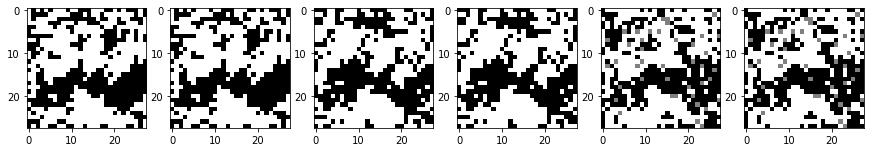

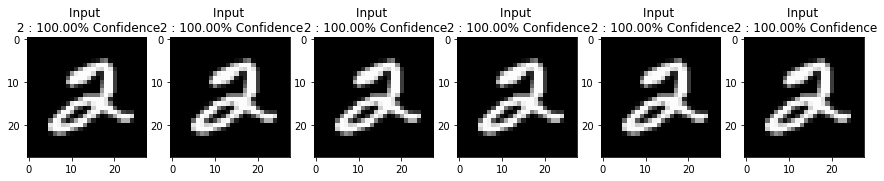

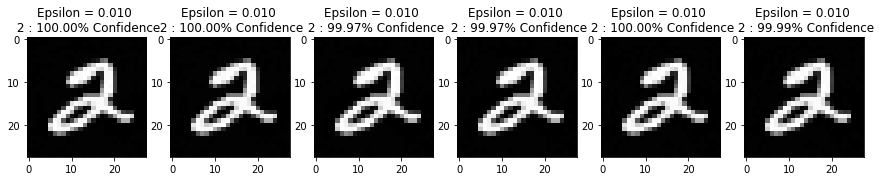

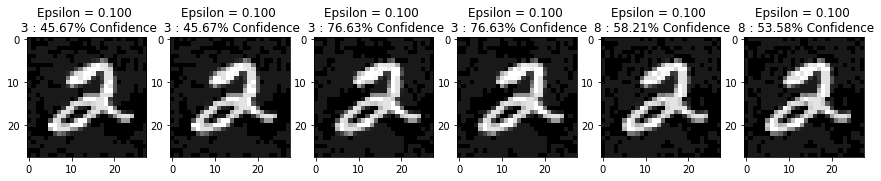

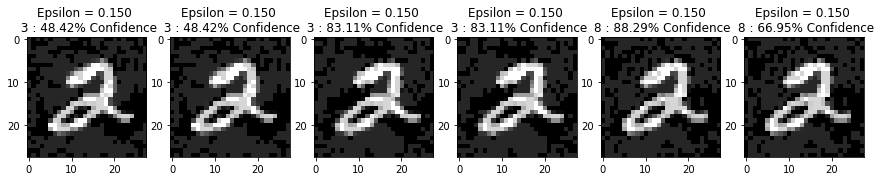

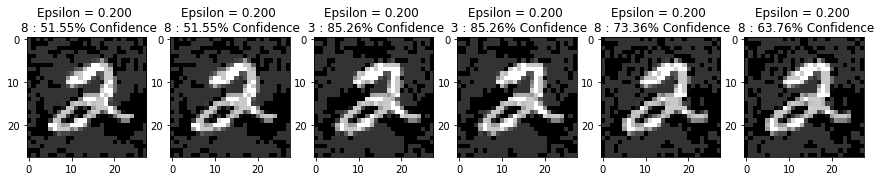

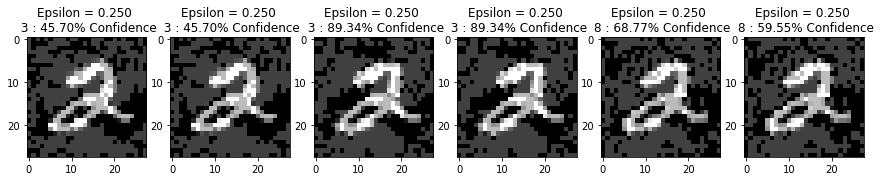

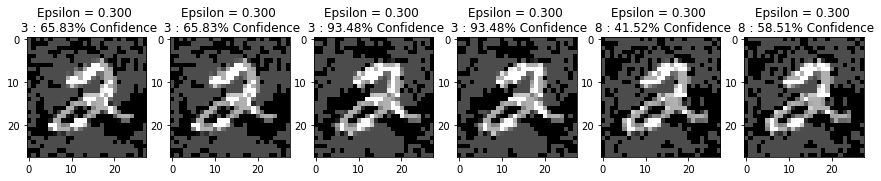

In [16]:
epsilons = [0, 0.01, 0.1, 0.15, 0.2, 0.25, 0.3]
descriptions = [('Epsilon = {:0.3f}'.format(eps) if eps else 'Input')
                for eps in epsilons]

index = np.argwhere(np.argmax(y_train, axis=1)==2)[0][0]
print(index)
x = x_train[index]
x = np.expand_dims(x, axis=0)
y = y_train[index]

models = [{'name': 'simple',
           'type': 'Normal',
          'model': simple_model},
          {'name': 'simple',
           'type': 'Multi',
          'model': simple_model},
          {'name': 'reg',
           'type': 'Normal',
          'model': regularized_model},
          {'name': 'reg',
           'type': 'Multi',
          'model': regularized_model},
          {'name': 'robust',
           'type': 'Normal',
          'model': robust_model},
          {'name': 'robust',
           'type': 'Multi',
          'model': robust_model}]
fig, axs = plt.subplots(1, len(models), figsize=(15,15))
perturbations = []
input_image = tf.convert_to_tensor(x)

for m in range(len(models)):
    if models[m]['type'] != 'Multi':
        input_label = y #models[m]['model'](input_image)        
        perturbation = create_adversarial_pattern(input_image, input_label, models[m])
    else:
        assert models[m]['name'] == models[m-1]['name']
        perturbation = perturbations[m-1]   
    axs[m].imshow(perturbation[0,:,:,0], cmap = 'gray')
    perturbations.append(perturbation)
plt.show()

for i, eps in enumerate(epsilons):    
    display_images(input_image, eps, perturbations, descriptions[i], models)